**(a) What is the problem of assuming our model data is independent?**


If we assume model data is independet there might be small relation in reality between our sample point due to diffrent factors. This will lead to wrong conclusions in our models. for instance if we are looking for significant diffrence between smoker and non smoker blood pressure subjects(fixed effect), and measurement between these two groups has done by two diffrente nurses(random effect) there is chance that variation between these two group arised because of random effect not fixed effect. in other word we are assuming each samples are independent but in our example they are dependent since each group has been measuresd by one nurse.  

(b) When should we use random effect on our linear model?

 bif fixed effects may vary from one observation to another its better to use random effect model or combination of them. in other words, whenever we are trying to estimate the effect of individual-specific characteristics such as grit or acumen that are inherently unmeasurable random effect model is better to used.

In [36]:
install.packages("lme4",
   repos=c("http://lme4.r-forge.r-project.org/repos",
      getOption("repos")[["CRAN"]]))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘RcppEigen’




In [37]:
library(dplyr)
library(ggplot2)
library(lme4)

Loading required package: Matrix



In [2]:
data = read.csv("NBA_stats.csv")
head(data)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,FT.,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,⋯,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
2,2,Jaylen Adams\adamsja01,PG,24,MIL,7,0,2.6,0.1,1.1,⋯,NA,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
3,3,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,⋯,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
4,4,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,⋯,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
5,5,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,25.9,5.4,11.4,⋯,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
6,5,LaMarcus Aldridge\aldrila01,C,35,SAS,21,18,25.9,5.5,11.8,⋯,0.838,0.8,3.7,4.5,1.7,0.4,0.9,1.0,1.7,13.7


In [6]:

dup_player_df = data %>% filter(Tm =="TOT")  %>% select(Player)
dup_players = dup_player_df[,1]
filtered_data = data[with(data,((Player %in% dup_players) & Tm == "TOT")| !(Player %in% dup_players)),] %>%
  mutate(Pos = replace(Pos, Pos == "PF-C", "PF"))%>%mutate(Pos = replace(Pos, Pos == "SG-SF", "SG"))%>%
  mutate(Pos = replace(Pos, Pos == "SF-PF", "SF"))%>%mutate(Pos = replace(Pos, Pos == "PF-SF", "PF"))%>%
  mutate(Pos = replace(Pos, Pos == "C-PF", "C"))%>%mutate(Pos = replace(Pos, Pos == "SG-PG", "SG"))%>%
  mutate(Pos = replace(Pos, Pos == "SF-SG", "SF"))%>%mutate(Pos = replace(Pos, Pos == "PG-SG", "PG"))
df = filtered_data[complete.cases(filtered_data),]
head(df, n=12)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,⋯,FT.,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Precious Achiuwa\achiupr01,PF,21,MIA,61,4,12.1,2.0,3.7,⋯,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
3,3,Steven Adams\adamsst01,C,27,NOP,58,58,27.7,3.3,5.3,⋯,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
4,4,Bam Adebayo\adebaba01,C,23,MIA,64,64,33.5,7.1,12.5,⋯,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
5,5,LaMarcus Aldridge\aldrila01,C,35,TOT,26,23,25.9,5.4,11.4,⋯,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
8,6,Ty-Shon Alexander\alexaty01,SG,22,PHO,15,0,3.1,0.2,0.8,⋯,0.500,0.1,0.5,0.7,0.4,0.0,0.1,0.2,0.1,0.6
9,7,Nickeil Alexander-Walker\alexani01,SG,22,NOP,46,13,21.9,4.2,10.0,⋯,0.727,0.3,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0
10,8,Grayson Allen\allengr01,SG,25,MEM,50,38,25.2,3.5,8.3,⋯,0.868,0.4,2.8,3.2,2.2,0.9,0.2,1.0,1.4,10.6
11,9,Jarrett Allen\allenja01,C,22,TOT,63,45,29.6,4.7,7.7,⋯,0.703,3.1,6.9,10.0,1.7,0.5,1.4,1.6,1.5,12.8
14,10,Al-Farouq Aminu\aminual01,PF,30,TOT,23,14,18.9,1.7,4.3,⋯,0.818,1.0,3.8,4.8,1.3,0.8,0.4,1.2,1.3,4.4


In [7]:
str(df)

'data.frame':	503 obs. of  30 variables:
 $ Rk    : int  1 3 4 5 6 7 8 9 10 11 ...
 $ Player: chr  "Precious Achiuwa\\achiupr01" "Steven Adams\\adamsst01" "Bam Adebayo\\adebaba01" "LaMarcus Aldridge\\aldrila01" ...
 $ Pos   : chr  "PF" "C" "C" "C" ...
 $ Age   : int  21 27 23 35 22 22 25 22 30 27 ...
 $ Tm    : chr  "MIA" "NOP" "MIA" "TOT" ...
 $ G     : int  61 58 64 26 15 46 50 63 23 69 ...
 $ GS    : int  4 58 64 23 0 13 38 45 14 69 ...
 $ MP    : num  12.1 27.7 33.5 25.9 3.1 21.9 25.2 29.6 18.9 27.3 ...
 $ FG    : num  2 3.3 7.1 5.4 0.2 4.2 3.5 4.7 1.7 4.5 ...
 $ FGA   : num  3.7 5.3 12.5 11.4 0.8 10 8.3 7.7 4.3 9.5 ...
 $ FG.   : num  0.544 0.614 0.57 0.473 0.25 0.419 0.418 0.618 0.384 0.468 ...
 $ X3P   : num  0 0 0 1.2 0.1 1.7 2.1 0.1 0.3 1.4 ...
 $ X3PA  : num  0 0.1 0.1 3.1 0.6 4.8 5.5 0.3 1.6 3.8 ...
 $ X3P.  : num  0 0 0.25 0.388 0.222 0.347 0.391 0.316 0.216 0.36 ...
 $ X2P   : num  2 3.3 7.1 4.2 0.1 2.5 1.3 4.6 1.3 3.1 ...
 $ X2PA  : num  3.7 5.3 12.4 8.3 0.2 5.2 2.8 7.3 2

`geom_smooth()` using formula 'y ~ x'



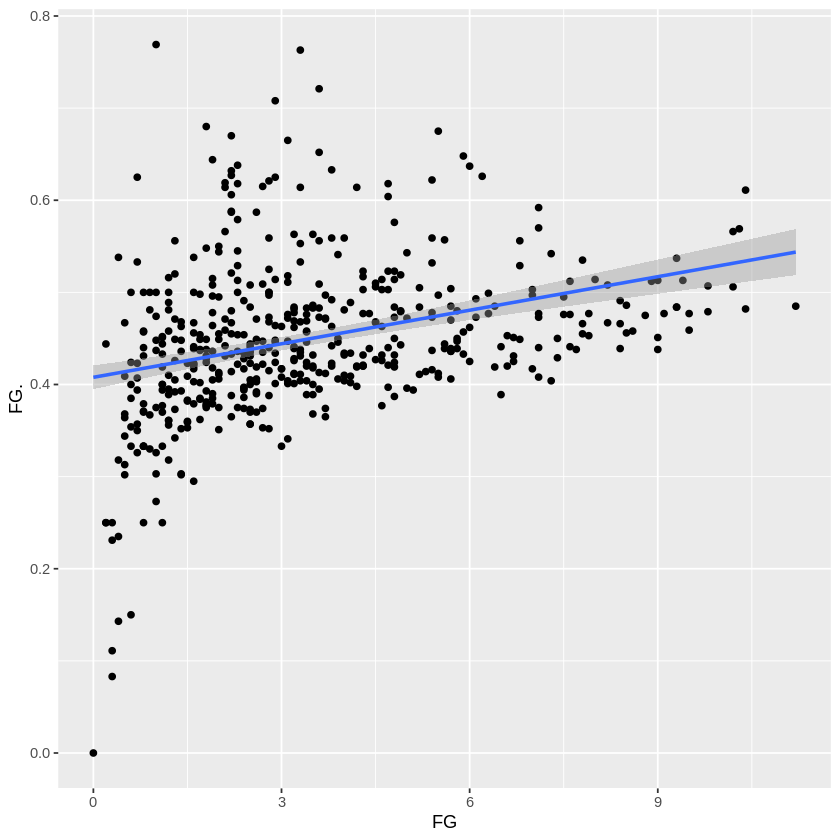

In [8]:
ggplot(df, aes(x=FG, y=FG.)) + 
  geom_point()+
  geom_smooth(method=lm)

**(d)Why did you use this plot and did you see any relation between these two variables?**  
Since we have two interval/ratio data, one of convenient ways to show their relation is scatter plot. it tells about overall attributes of data without lots of preprocessing. A regression line has been also fitted to plot to show it might be a linear relation. further statistical test can test this hypothesis.

In [13]:
linear_model = lm(FG. ~ FGA, data = df)
summary(linear_model)


Call:
lm(formula = FG. ~ FGA, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42937 -0.04728 -0.00905  0.03501  0.33732 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.4279221  0.0071109  60.178  < 2e-16 ***
FGA         0.0028877  0.0007982   3.618 0.000328 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08535 on 501 degrees of freedom
Multiple R-squared:  0.02546,	Adjusted R-squared:  0.02351 
F-statistic: 13.09 on 1 and 501 DF,  p-value: 0.0003275


In [ ]:
plot(linear_model)

(e) As we can see Residuals have normal distribution around line, and also QQ plot looks like a line. the P value is also  0.0003275 which shows strong linear relation.

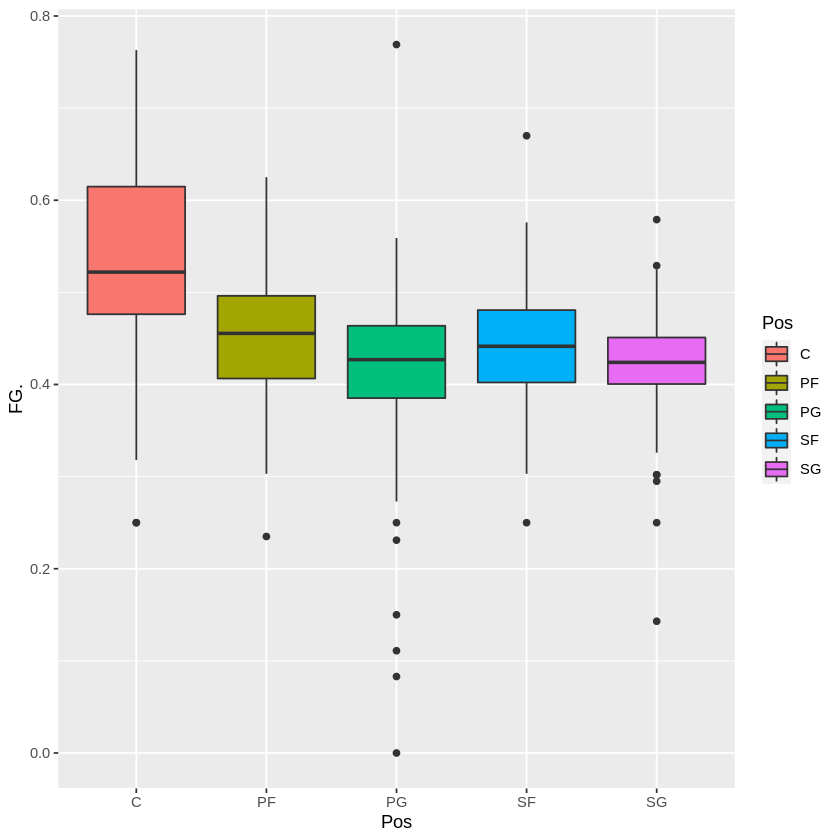

In [25]:
ggplot(df,mapping=aes(x=Pos, y=FG., fill=Pos)) + 
  geom_boxplot()

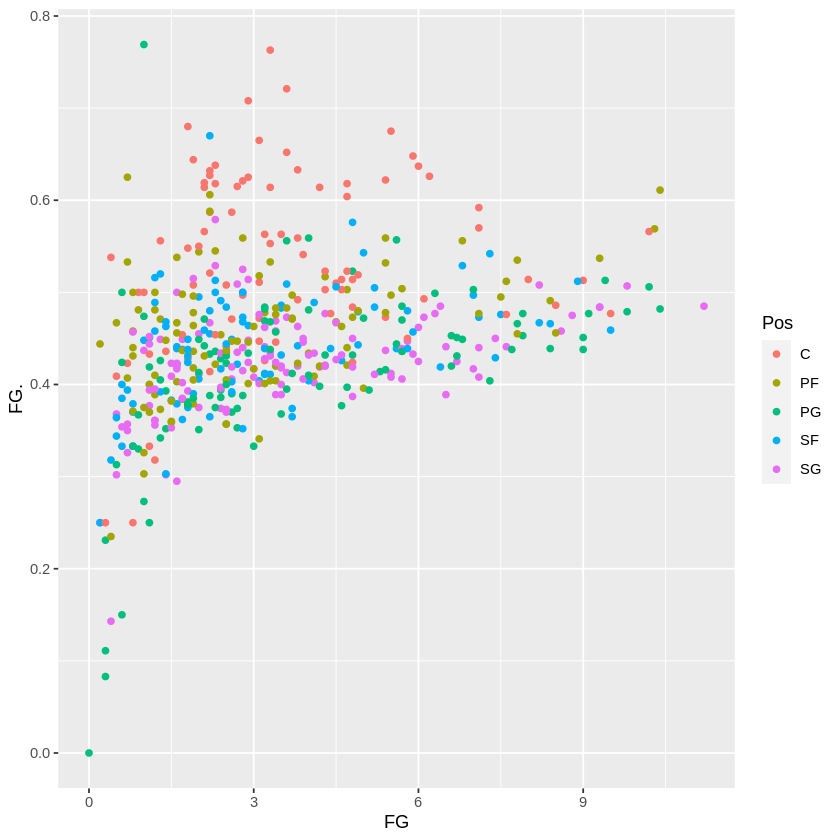

In [29]:
ggplot(df, aes(x=FG, y=FG., color=Pos)) + 
  geom_point()

**(f)Do you see any difference in boxplots of each position? Explain it. Use the plot of part d by coloring the position of players. Does position affect these values? Explain it. Can this phenomenon be an example of random effect? Why?**

As we can see position has affected variation of field goal percentage (notice PG and C boxplots). we can not ignor these variation. We are interested in FG and FG% therefore they are fixed factor or fixed effect. postion is random effect since we are not interested in, although it affects FG%.

**(g)Extend the linear model you used in part e by adding position
variable to it. (you can use lme4 library in R for this part) Discuss about
the statistics that R gives to you. How much of the variance is not
explained by fixed effect? Does this library report p-value as a statistic?
Why?**

In [40]:
mixed_linearmodel = lmer(FG. ~ FGA + (1|Pos), data = df)
summary(mixed_linearmodel)

Linear mixed model fit by REML ['lmerMod']
Formula: FG. ~ FGA + (1 | Pos)
   Data: df

REML criterion at convergence: -1155.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1455 -0.5246 -0.0456  0.5219  5.1910 

Random effects:
 Groups   Name        Variance Std.Dev.
 Pos      (Intercept) 0.002488 0.04988 
 Residual             0.005488 0.07408 
Number of obs: 503, groups:  Pos, 5

Fixed effects:
             Estimate Std. Error t value
(Intercept) 0.4226761  0.0231572  18.252
FGA         0.0040338  0.0007029   5.739

Correlation of Fixed Effects:
    (Intr)
FGA -0.227

In [42]:
0.002488/(0.002488 +  0.005488) *100

[1] 31.19358

As we can see 31% of  variance has not been explained by fixed effect. so there is underlying variablity that is not explained by FG. therefor Pos should be considered as random effect in our analysis.

This library does not report p value. we are using random effect therefore no p value is provided while using random effect in linear models. computing exact p value can be very complicated since degree of freedom is not to easy to get in this case.

**(h)Can you design a statistic to show that adding this extra variable was
useful? Explain your test**

We can use liklihood ratio test in bootstrap. if ratio of logliklihood test is significantly diffrent from zero we can conclude adding new variable is useful.
Then we bootstrap under null hypothesis and generate lots of liklihood ratio test statistics. Afterward, we count how many simulated cases exceed the observed statistics in our data, if the number is close to zero indicate significance of random effect.